In [28]:
#Importing requires libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [29]:
#Importing the data 
data = pd.read_excel('DataSample.xlsx')


In [30]:
#Checking the head of the data 
data1 = data.copy()
data.head()

,pan,pincode,gender,monthlyIncome,Age,city_name,Emp_Type,reportDate,score,accountHolderTypeId,...,dateClosed,dateofLastPayment,openDate,dateReported,highCredit,paymentHistoryProfile,settlementAmount,writtenoffAmtTotal,accountTypeName,accountStatusName
0,57cd4dd8c3295123551c9eadc823dfc1,431542.0,MALE,NaN,28.5,Parbhani,NaN,2020-12-23,620,1,...,2019-12-13,2019-12-13,2019-11-28,2019-12-31,4500.0,"0,0,",NaN,NaN,Personal Loan,Closed
1,57cd4dd8c3295123551c9eadc823dfc1,431542.0,MALE,NaN,28.5,Parbhani,NaN,2020-12-23,620,1,...,NaN,2019-11-18,2019-11-02,2020-12-04,2000.0,"363,345,328,294,258,242,0,185,163,115,87,41,13,",NaN,NaN,Personal Loan,Suit filed
2,57cd4dd8c3295123551c9eadc823dfc1,431542.0,MALE,NaN,28.5,Parbhani,NaN,2020-12-23,620,1,...,NaN,NaN,2019-11-13,2020-11-30,5000.0,"352,322,291,261,230,199,169,138,108,77,48,17,0,",NaN,NaN,Personal Loan,Active
3,57cd4dd8c3295123551c9eadc823dfc1,431542.0,MALE,NaN,28.5,Parbhani,NaN,2020-12-23,620,1,...,2020-03-14,2020-03-14,2019-03-18,2020-05-31,12500.0,"0,0,0,53,55,54,54,54,54,24,24,0,0,0,0,",NaN,NaN,Consumer Loan,Closed
4,57cd4dd8c3295123551c9eadc823dfc1,431542.0,MALE,NaN,28.5,Parbhani,NaN,2020-12-23,620,1,...,2019-11-13,2019-11-13,2019-10-12,2019-11-30,4000.0,"0,0,",NaN,NaN,Personal Loan,Closed


In [50]:
#List of all the avialable column names 
data.columns

Index(['pan', 'pincode', 'gender', 'monthlyIncome', 'Age', 'city_name',
       'Emp_Type', 'reportDate', 'score', 'accountHolderTypeId',
       'amountPastDue', 'creditLimitAmount', 'currentBalance', 'dateClosed',
       'dateofLastPayment', 'openDate', 'dateReported', 'highCredit',
       'paymentHistoryProfile', 'settlementAmount', 'writtenoffAmtTotal',
       'accountTypeName', 'accountStatusName'],
      dtype='object')

In [51]:
# Removing irralavent variables 
data.drop(['pincode', 'accountHolderTypeId', 'city_name', 'settlementAmount', 'writtenoffAmtTotal'], axis=1, inplace=True)

In [52]:
# Checking for null values in the data 
(data.isnull().sum()/data.shape[0])*100

pan                       0.000000
gender                    0.000000
monthlyIncome             3.125136
Age                       0.000000
Emp_Type                 13.972224
reportDate                0.000000
score                     0.000000
amountPastDue             0.000000
creditLimitAmount        90.165754
currentBalance            0.000000
dateClosed               35.719414
dateofLastPayment        16.746078
openDate                  0.000000
dateReported              0.000000
highCredit                1.168301
paymentHistoryProfile     0.000000
accountTypeName           0.000000
accountStatusName         0.000000
dtype: float64

* dateClosed have 35.71 percent of missing values. Maybe these are the customers whose account is still ative.

In [53]:
# Creating intraction variables 
data['CreditLimit'] = data[['creditLimitAmount', 'highCredit']].max(axis=1)
data['TotalDue'] = data[['amountPastDue', 'currentBalance']].max(axis=1)

In [54]:
# Divinding variables based on datatypes
num_var = ['monthlyIncome', 'Age', 'score', 'CreditLimit', 'TotalDue']
cat_var = ['gender', 'Emp_Type', 'accountTypeName', 'accountStatusName']

## Analysing Continuous Variables 

In [55]:
def UVA_Cont(data1, column, include_outlier=True, bw=1):
    
    """
    Function for univariate analysis of continiuous variables.
    Plots Kdeplot and Boxplot for given continiuous variable. 
    It also takes in argument of wheater to include the outliers while ploting the graphs or not.
    By default it plots graphs with outliers.
    """
    data = data1.copy()
    
    for i in column:
    
        if include_outlier == False:
            
            #Calculating quantiles 
            quant25 = data[i].quantile(0.25)
            quant75 = data[i].quantile(0.75)
            IQR     = quant75 - quant25
            
            # Fitlering data(removing outliers)
            data[i] = data[i][(data[i] < (quant75+ 1.5*IQR)) & (data[i] > (quant25- 1.5*IQR))]
        
        
        #Calculating descriptive statistics 
        mini    = data[i].min()
        maxi    = data[i].max()
        rang    = mini - maxi
        mean    = data[i].mean()
        med     = data[i].median()
        std_    = data[i].std()
        skew    = data[i].skew()
        kurt    = data[i].kurtosis()
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR     = quant75 - quant25
        whis_low = quant25 - (1.5*IQR)
        whis_high = quant75 + (1.5*IQR)
        
        #Calculating the points of standerd daviation 
        points = mean-std_, mean+std_
        
        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i]>whis_high])
        outlier_low = len(data[i][data[i]<whis_low])
        
    
        #Ploting kdeplot for continious variable 
        plt.figure(figsize=(18,6))
        sns.set_style('white')
        gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
        ax0 = plt.subplot(gs[0])
        
        sns.kdeplot(data[i],shade=True, bw=bw)
        sns.lineplot(points,[0,0],color='black',label='std_dev')
        sns.scatterplot([mini,maxi],[0,0],color='red',label='min\max')
        sns.scatterplot(mean,[0],color='blue',label='mean')
        sns.scatterplot(med,[0],color='green',label='median')
        plt.xlabel("{}".format(i),fontsize=(14))
        plt.ylabel('density',fontsize=(14))
        plt.tight_layout()
        plt.title('\tstd_dev= {}; \tkurtosis= {}; \tskew= {};\n\tmean= {}; \tmedian= {}; \trange = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                     round(skew,2),
                                                                                                     round(mean,2),
                                                                                                     round(med,2),
                                                                                                     (round(mini,2),round(maxi,2),round(rang,2))),fontsize=14)
        plt.tight_layout()
            
        #Ploting boxplot for continious variable
        ax1 = plt.subplot(gs[1])
        sns.boxplot(data[i], orient="v")
        plt.title('\tIQR = {};\tOutlier (low/high) = {};\n\t2nd,3rd  quartile = {};'.format(round(IQR,2),
                                                                                                (outlier_low,outlier_high),
                                                                                                (round(quant25,2),round(quant75,2))), fontsize=14)
        plt.ylabel("{}".format(i),fontsize=(14))
        plt.tight_layout()
            

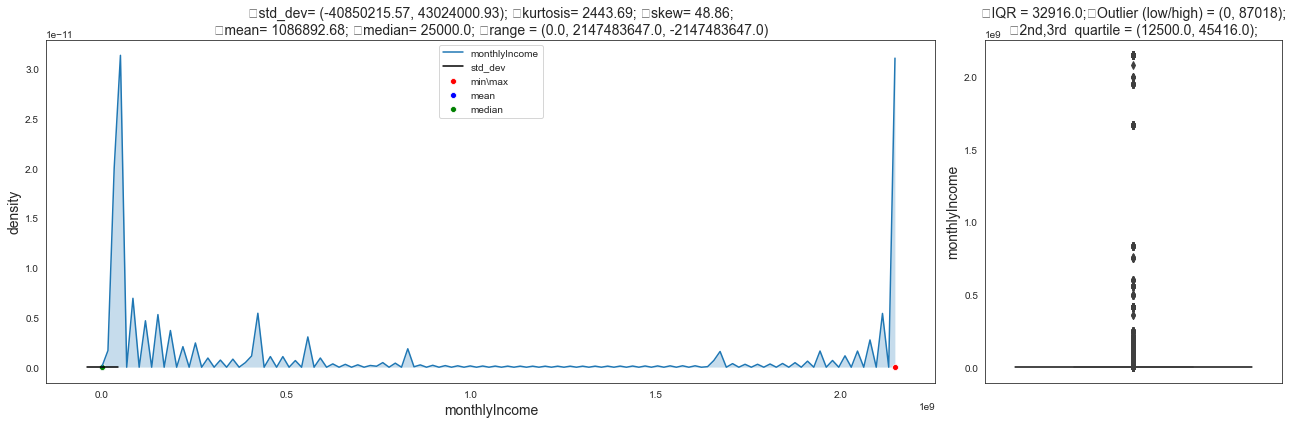

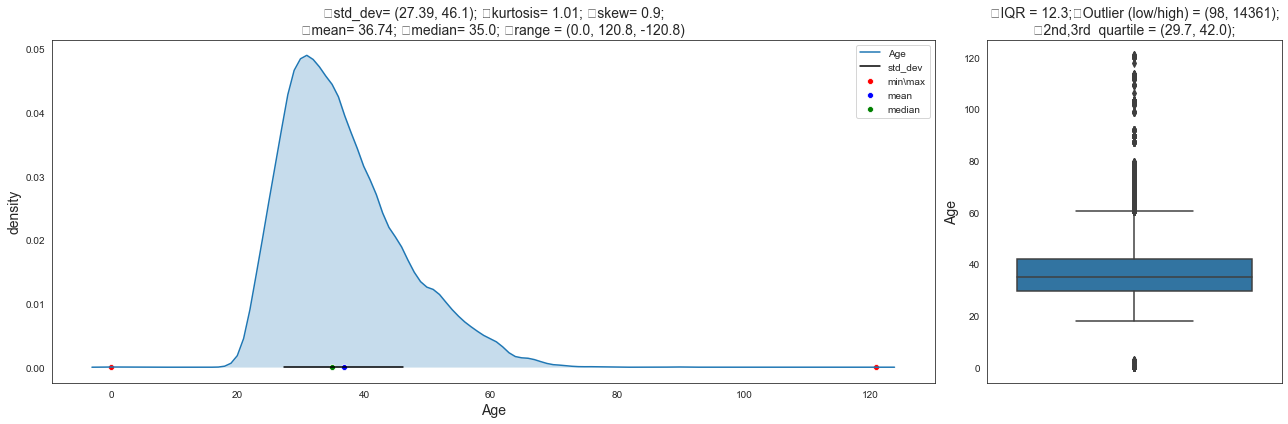

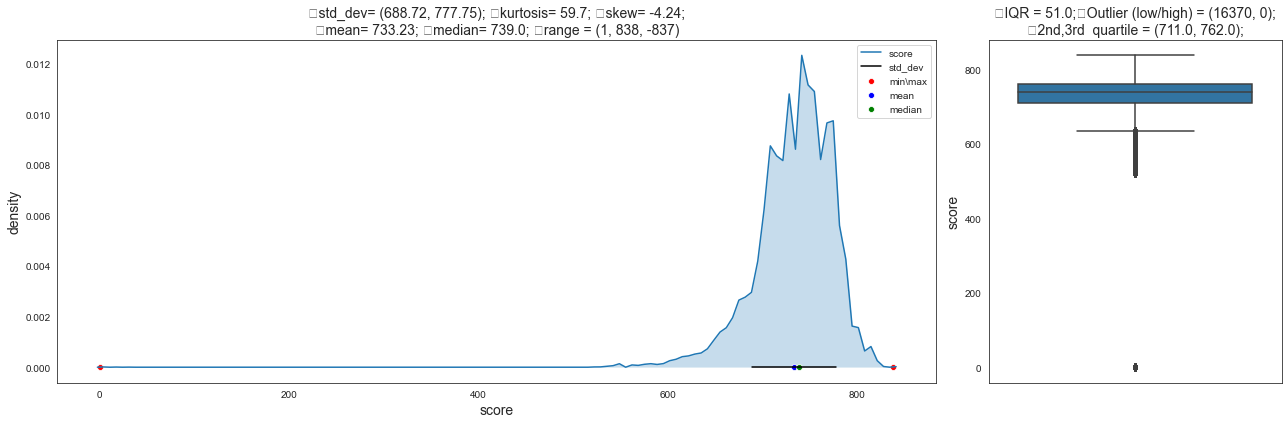

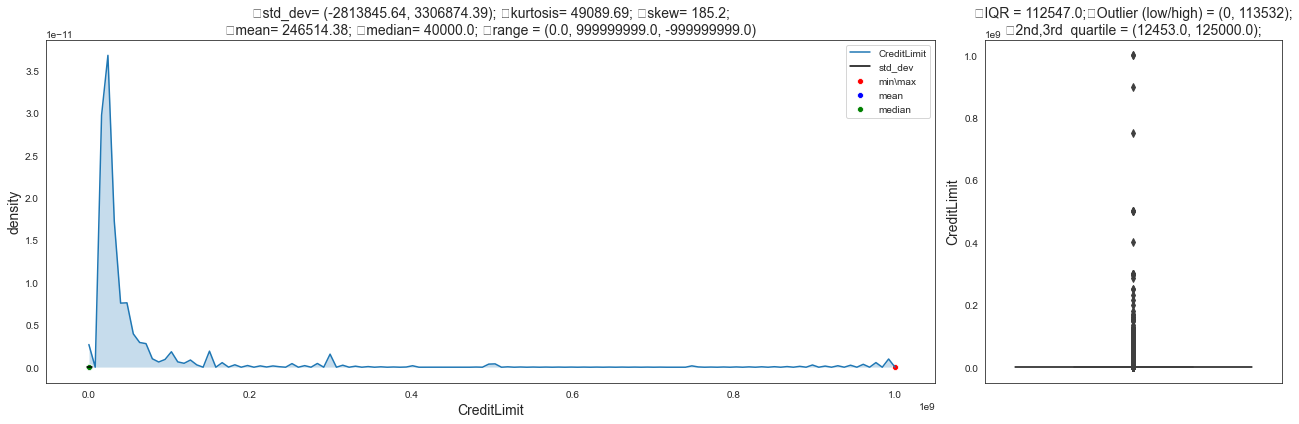

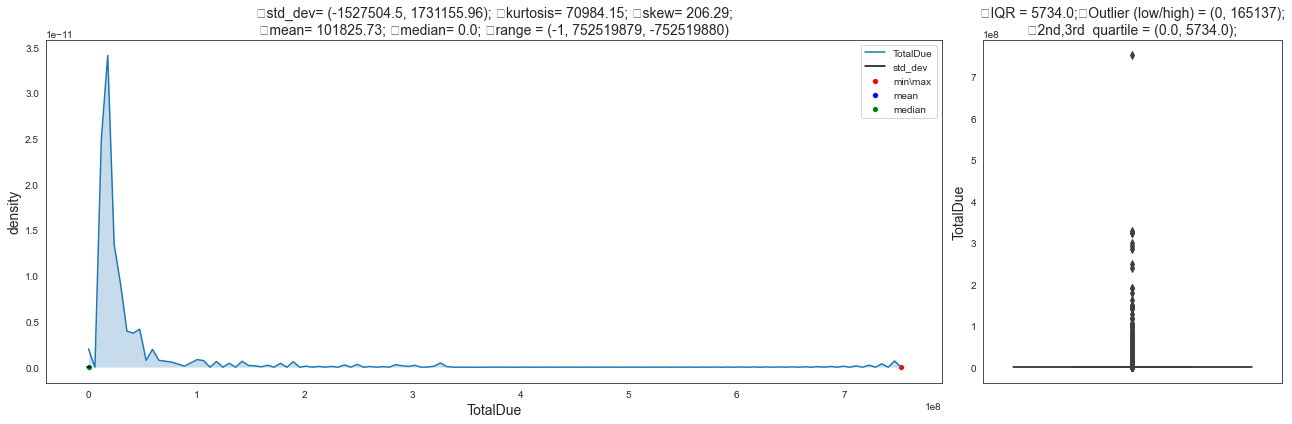

In [56]:
UVA_Cont(data, num_var)

### Observations:
* There are many people with 0 as salaries ans some with very high extreme values. As this is publically collected data so salaries could be incorrect in most cases. 
* There are people with ages as low as 0 and as high as 120 which is not possible. 
* Score variable looking correct as the avg credit score of individuals lies around 733 and range between 1 and 833.
* Median for TotalDues is 0 that means more than half of the customer doesn't have any due amount. 
* Median for credit limit is 40000.

In [57]:
# Changing the outlier values in Age variable with mean 
data[(data['Age'] <18) | (data['Age']> 65)]

,pan,gender,monthlyIncome,Age,Emp_Type,reportDate,score,amountPastDue,creditLimitAmount,currentBalance,dateClosed,dateofLastPayment,openDate,dateReported,highCredit,paymentHistoryProfile,accountTypeName,accountStatusName,CreditLimit,TotalDue
593,4f4d9520115ac0373d57e054262eedc5,MALE,0.0,0.0,NaN,2020-12-23,687,0,NaN,286026,NaN,2020-05-21,2018-07-05,2020-06-30,430000.0,"0,0,14,45,76,78,78,200,170,139,109,78,77,78,47...",Auto Loan (Personal),Active,430000.0,286026
3129,4f0ff275a18ed7a5517a45f62fd5106b,MALE,50000.0,1.8,Salaried,2020-12-23,714,-1,NaN,75253,NaN,2020-11-05,2020-09-18,2020-11-30,78200.0,"0,0,0,",Two-Wheeler Loan,Active,78200.0,75253
4226,4299e13bf064b696a2f03b10cfab02c2,MALE,27000.0,65.9,Self Employment Business,2020-12-23,720,0,NaN,106959,NaN,NaN,2005-08-08,2006-09-30,150700.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,",(BLPS-OTH) Business Loan – Priority Sector – O...,Active,150700.0,106959
4227,4299e13bf064b696a2f03b10cfab02c2,MALE,27000.0,65.9,Self Employment Business,2020-12-23,720,0,NaN,0,2010-08-27,2009-07-28,2007-04-17,2018-05-06,15431.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",Credit Card,Closed,15431.0,0
4228,4299e13bf064b696a2f03b10cfab02c2,MALE,27000.0,65.9,Self Employment Business,2020-12-23,720,-1,NaN,0,2016-05-27,2016-05-27,2007-07-06,2020-11-30,29787.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",Credit Card,Closed,29787.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779303,5fb5829391d9d03796fffb79fd15d468,MALE,40000.0,66.1,Salaried,2020-12-17,750,0,NaN,0,2018-09-13,2018-09-05,2018-01-08,2018-09-30,36900.0,"0,0,0,0,0,0,0,0,0,",Consumer Loan,Closed,36900.0,0
779304,5fb5829391d9d03796fffb79fd15d468,MALE,40000.0,66.1,Salaried,2020-12-17,750,0,NaN,121725,NaN,2020-10-30,2016-10-18,2020-10-31,500000.0,"0,0,0,0,0,0,0,31,0,0,61,30,31,30,31,31,61,31,6...",Personal Loan,Active,500000.0,121725
779305,5fb5829391d9d03796fffb79fd15d468,MALE,40000.0,66.1,Salaried,2020-12-17,750,0,NaN,0,2012-11-09,NaN,2010-04-28,2012-11-30,150000.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",Other,Closed,150000.0,0
779306,5fb5829391d9d03796fffb79fd15d468,MALE,40000.0,66.1,Salaried,2020-12-17,750,0,NaN,0,2017-08-24,2017-03-02,2016-06-11,2019-07-31,35790.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",Consumer Loan,Closed,35790.0,0


* There are 5065 rows with ages less than 18 and greater than 65.

In [58]:
data['Age'] =  data['Age'].apply(lambda x: np.NaN if ((x<18) | (x>65)) else x)
data['Age'].fillna(data['Age'].mean(), inplace=True)

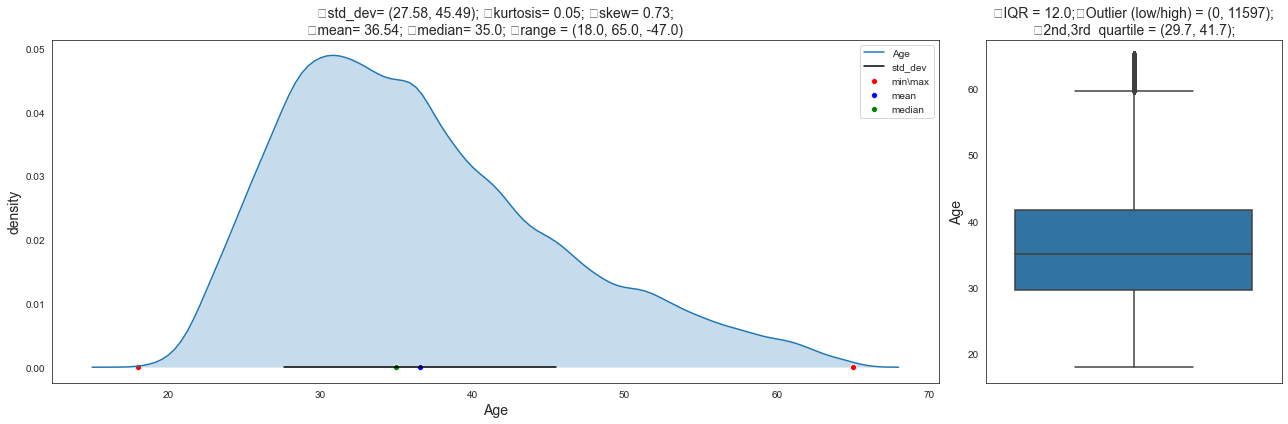

In [59]:
UVA_Cont(data, ['Age'])

In [60]:
data.columns

Index(['pan', 'gender', 'monthlyIncome', 'Age', 'Emp_Type', 'reportDate',
       'score', 'amountPastDue', 'creditLimitAmount', 'currentBalance',
       'dateClosed', 'dateofLastPayment', 'openDate', 'dateReported',
       'highCredit', 'paymentHistoryProfile', 'accountTypeName',
       'accountStatusName', 'CreditLimit', 'TotalDue'],
      dtype='object')

In [61]:
# Changing Outliers in CreditLimit and TotalDue with median 
data[data['CreditLimit'] > (125000+(1.5*112547))]['CreditLimit'] = 125000
data[data['TotalDue'] > (5734+(1.5*5734))]['TotalDue'] = 5734

### Analysing Categorical Variables 

In [62]:
data['accountStatusName'] = data['accountStatusName'].apply(lambda x: x if x== 'Closed' else(x if x == 'Active' else 'Default'))

In [63]:
def UVA_Cat(data, column, rot=0):
    """
    Function to plot countplot and pie chart for categorical variables.
    
    """
    for j, i in enumerate(column):
        
        
        # Setting the figure size
        plt.figure(figsize=(10,3), dpi=100)
    
    
        # ploting the barplot
        plt.subplot(1,2,1)
        g=sns.countplot(x=i, data= data)
        plt.title('Barplot for {}'.format(i), fontsize=14)
        plt.xticks(rotation=rot)
        #plt.rc('xtick',labelsize=8)
        plt.tight_layout()
        
        #ploting the pie chart 
        plt.subplot(1,2,2)
        plt.axis('equal')
        plt.pie(x= data[i].value_counts(), labels= data[i].value_counts().index, autopct='%0.1f%%', shadow=True)
        plt.title('Pie chart for {}'.format(i), fontsize=14)
        plt.tight_layout()
        plt.show()

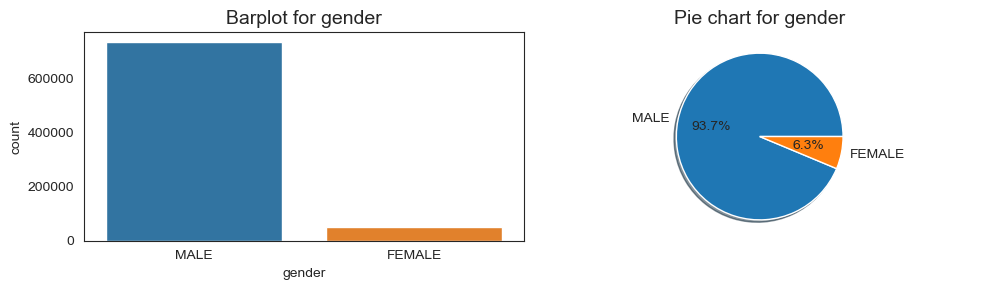

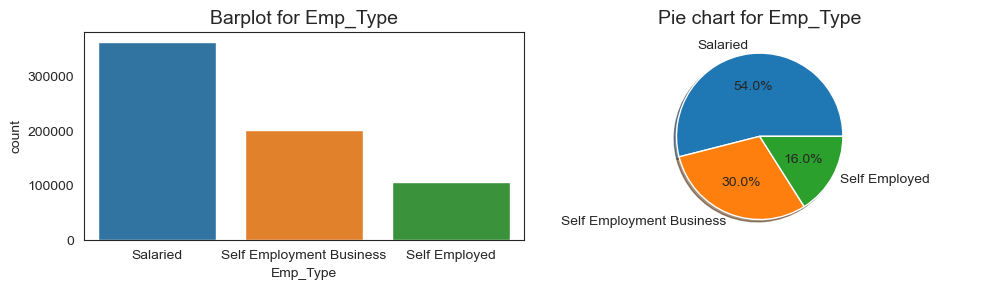

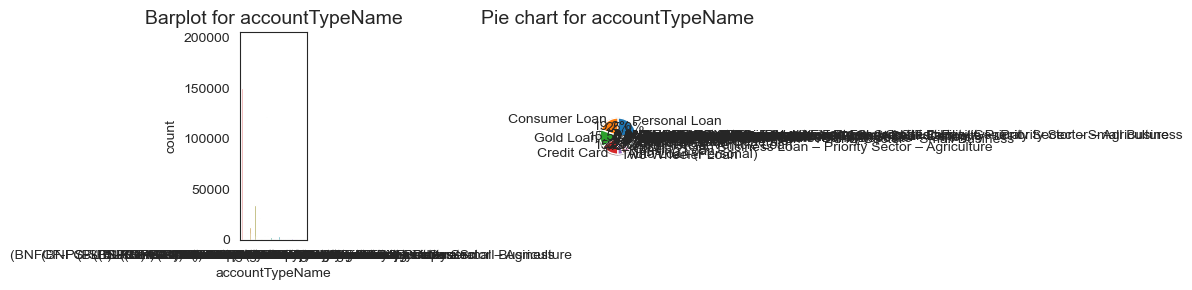

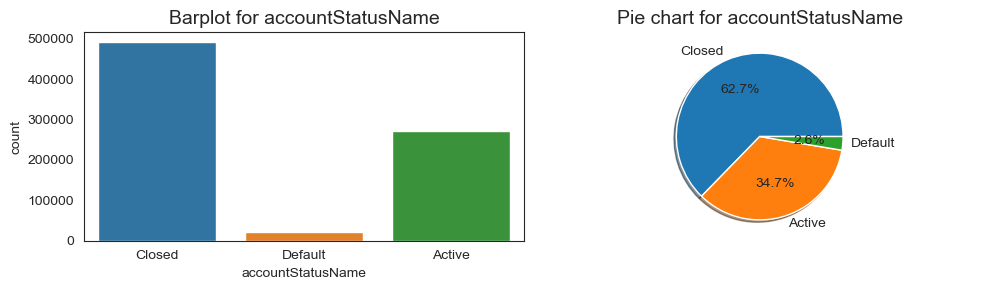

In [64]:
UVA_Cat(data, cat_var)

### Observations: 
* 94% of the people are Male. 
* 54% of the people are Salaried type. 
* There are a lot of categories in accountTypeName, we might need to preprocess it to find any inferences. 
* Only 2.6% of the cases, where the person has defaulted.

<AxesSubplot:xlabel='Emp_Type', ylabel='Age'>

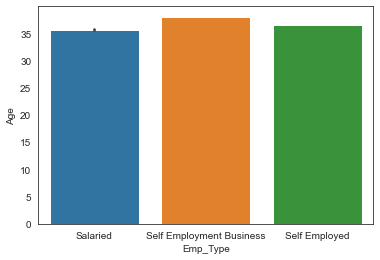

In [65]:
sns.barplot(data['Emp_Type'], data['Age'])

In [66]:
# Imputation for missing values
#data['gender'].replace({'MALE':1, 'FEMALE':0}, inplace=True)
#data['Emp_Type'].replace({'Salaried':1, 'Self Employment Business': 2, 'Self Employed':3}, inplace=True)
data['Emp_Type'].fillna(0,inplace=True)
agg_data = data.groupby('pan', as_index=False).agg({'gender':pd.Series.mode, 'Age':np.mean,'Emp_Type':pd.Series.mode})

In [67]:
agg_data['Emp_Type'].unique()

array(['Self Employment Business', 'Salaried', 'Self Employed', 0],
      dtype=object)

In [68]:
data['accountTypeName'].nunique(), data['accountTypeName'].unique()

(42,
 array(['Personal Loan', 'Consumer Loan', 'Auto Loan (Personal)',
        'Credit Card', 'Overdraft', 'Housing Loan',
        'Commercial Vehicle Loan', 'Business Loan General',
        'Property Loan', 'Two-Wheeler Loan', 'Used Car Loan',
        'Prime Minister Jaan Dhan Yojana - Overdraft', 'Other',
        'Microfinance Business Loan', 'Business Loan - Secured',
        '(BLPS-SB) Business Loan – Priority Sector – Small Business',
        'Gold Loan', 'Kisan Credit Card', 'Loan on Credit Card',
        'Microfinance Personal Loan', 'Corporate Credit Card',
        'Mudra Loans – Shishu / Kishor / Tarun', 'Secured Credit Card',
        '(BLPS-AGR) Business Loan – Priority Sector – Agriculture',
        'Education Loan', 'Construction Equipment Loan',
        '(BNFCF-PS-SB) Business Non-Funded Credit Facility – Priority Sector – Small Business',
        'Pradhan Mantri Awas Yojana - CLSS',
        '(BNFCF-GEN) Business Non-Funded Credit Facility – General',
        '(BLPS-OTH) B

* There are 42 unique types of account names 

In [69]:
data['accountTypeName'].value_counts()[:5]

Personal Loan       195682
Consumer Loan       150316
Gold Loan           121732
Credit Card         119045
Two-Wheeler Loan     34987
Name: accountTypeName, dtype: int64

### Observations: 
* Mostly people have appled for Personal Loan, Consumer Loan, Gold Loan and Credit Loan  

In [70]:
data['accountTypeName'].value_counts(normalize=True)[:10]*100

Personal Loan                                               24.996232
Consumer Loan                                               19.201222
Gold Loan                                                   15.549929
Credit Card                                                 15.206695
Two-Wheeler Loan                                             4.469206
Auto Loan (Personal)                                         3.890420
Housing Loan                                                 2.828142
Other                                                        2.709090
(BLPS-AGR) Business Loan – Priority Sector – Agriculture     2.296748
Commercial Vehicle Loan                                      1.614749
Name: accountTypeName, dtype: float64

* 70 percent of the times the loan name is for the top for listed above. 

In [71]:
# Segrigating accountTypeName
data['accountTypeName'].replace({'Two-Wheeler Loan':'Vehicle Loan', 'Auto Loan (Personal)': 'Vehicle Loan',
                                'Commercial Vehicle Loan': 'Vehicle Loan', 'Housing Loan': 'Personal Loan'}, inplace=True)

data['accountTypeName'] = data['accountTypeName'].apply(lambda x: x if (x == 'Personal Loan')|(x == 'Consumer Loan')|
                              (x == 'Gold Loan')|(x == 'Credit Card')|(x == 'Vehicle Loan') else 'Other')

In [72]:
data['accountTypeName'].value_counts(normalize=True)[:10]*100

Personal Loan    27.824374
Consumer Loan    19.201222
Gold Loan        15.549929
Credit Card      15.206695
Other            12.243404
Vehicle Loan      9.974376
Name: accountTypeName, dtype: float64

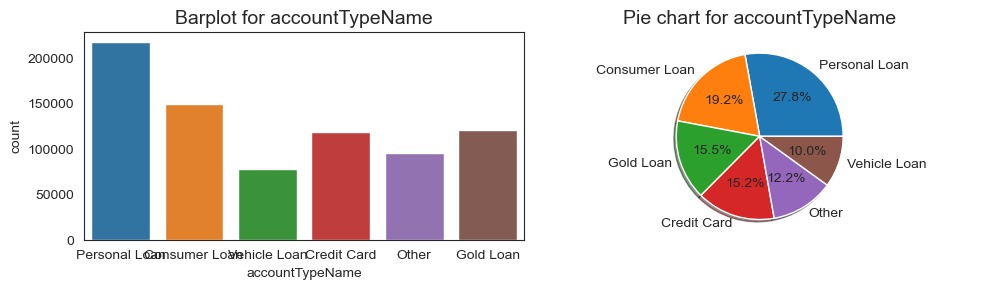

In [73]:
UVA_Cat(data, ['accountTypeName'])

* Most of the defaulters lies between credit score of 450 to 650. 


In [74]:
# New variable wheather the account is active or not
data['AccountClosed'] = data['dateClosed'].fillna(0).apply(lambda x: 0 if x == 0 else 1)

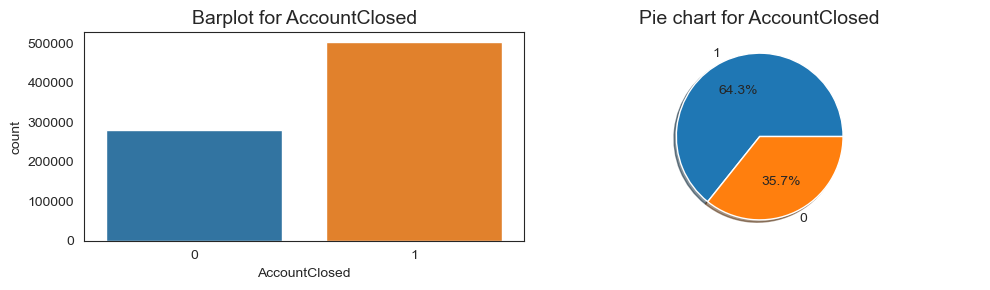

In [75]:
UVA_Cat(data, ['AccountClosed'])

* 36% of times the user has closed its account. 

In [76]:
# Numebr of months the customer is paying installment for 
data['MonthsPaying'] = data['paymentHistoryProfile'].str.split(',').apply(lambda x : len(x)-1)

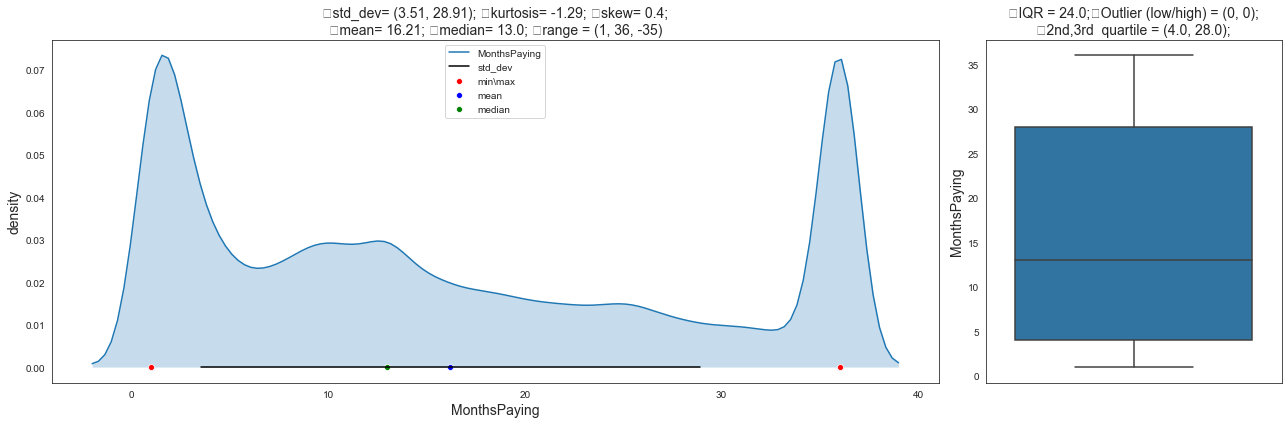

In [77]:
UVA_Cont(data, ['MonthsPaying'])

In [99]:
# Number of times the customer has paid the installment on time 
data['MonthsTimlyPaid'] = data['paymentHistoryProfile'].str.split(',').apply(lambda x : x.count('0'))

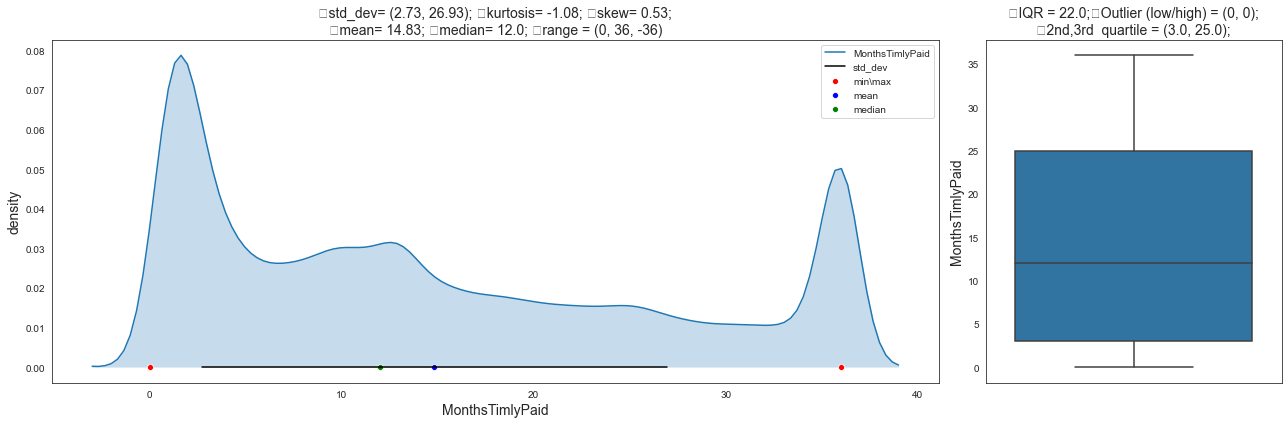

In [101]:
UVA_Cont(data, ['MonthsTimlyPaid'])

In [121]:
def percent(x):
    return round((x['MonthsTimlyPaid']/x['MonthsPaying'])*100,2)

data['PercTimlyPaid'] = data.apply(percent, axis=1)

In [103]:
data.columns

Index(['pan', 'gender', 'monthlyIncome', 'Age', 'Emp_Type', 'reportDate',
       'score', 'amountPastDue', 'creditLimitAmount', 'currentBalance',
       'dateClosed', 'dateofLastPayment', 'openDate', 'dateReported',
       'highCredit', 'paymentHistoryProfile', 'accountTypeName',
       'accountStatusName', 'CreditLimit', 'TotalDue', 'AccountClosed',
       'MonthsPaying', 'MonthsTimlyPaid'],
      dtype='object')

In [102]:
data.head()

,pan,gender,monthlyIncome,Age,Emp_Type,reportDate,score,amountPastDue,creditLimitAmount,currentBalance,...,dateReported,highCredit,paymentHistoryProfile,accountTypeName,accountStatusName,CreditLimit,TotalDue,AccountClosed,MonthsPaying,MonthsTimlyPaid
0,57cd4dd8c3295123551c9eadc823dfc1,MALE,NaN,28.5,0,2020-12-23,620,0,NaN,0,...,2019-12-31,4500.0,"0,0,",Personal Loan,Closed,4500.0,0,1,2,2
1,57cd4dd8c3295123551c9eadc823dfc1,MALE,NaN,28.5,0,2020-12-23,620,5146,NaN,1000,...,2020-12-04,2000.0,"363,345,328,294,258,242,0,185,163,115,87,41,13,",Personal Loan,Default,2000.0,5146,0,13,1
2,57cd4dd8c3295123551c9eadc823dfc1,MALE,NaN,28.5,0,2020-12-23,620,5191,NaN,5191,...,2020-11-30,5000.0,"352,322,291,261,230,199,169,138,108,77,48,17,0,",Personal Loan,Active,5000.0,5191,0,13,1
3,57cd4dd8c3295123551c9eadc823dfc1,MALE,NaN,28.5,0,2020-12-23,620,0,NaN,0,...,2020-05-31,12500.0,"0,0,0,53,55,54,54,54,54,24,24,0,0,0,0,",Consumer Loan,Closed,12500.0,0,1,15,7
4,57cd4dd8c3295123551c9eadc823dfc1,MALE,NaN,28.5,0,2020-12-23,620,0,NaN,0,...,2019-11-30,4000.0,"0,0,",Personal Loan,Closed,4000.0,0,1,2,2


In [104]:
# Removing irrelevent data 
data.drop(['monthlyIncome', 'reportDate', 'amountPastDue','creditLimitAmount', 'currentBalance',
          'dateReported','highCredit', 'paymentHistoryProfile','dateClosed', 'dateofLastPayment', 'openDate'], axis=1, inplace=True)

In [122]:
data.head()

,pan,gender,Age,Emp_Type,score,accountTypeName,accountStatusName,CreditLimit,TotalDue,AccountClosed,MonthsPaying,MonthsTimlyPaid,PercTimlyPaid
0,57cd4dd8c3295123551c9eadc823dfc1,MALE,28.5,0,620,Personal Loan,Closed,4500.0,0,1,2,2,100.00
1,57cd4dd8c3295123551c9eadc823dfc1,MALE,28.5,0,620,Personal Loan,Default,2000.0,5146,0,13,1,7.69
2,57cd4dd8c3295123551c9eadc823dfc1,MALE,28.5,0,620,Personal Loan,Active,5000.0,5191,0,13,1,7.69
3,57cd4dd8c3295123551c9eadc823dfc1,MALE,28.5,0,620,Consumer Loan,Closed,12500.0,0,1,15,7,46.67
4,57cd4dd8c3295123551c9eadc823dfc1,MALE,28.5,0,620,Personal Loan,Closed,4000.0,0,1,2,2,100.00


In [123]:
# Checking Null Values
data.isnull().sum()

pan                     0
gender                  0
Age                     0
Emp_Type                0
score                   0
accountTypeName         0
accountStatusName       0
CreditLimit          8116
TotalDue                0
AccountClosed           0
MonthsPaying            0
MonthsTimlyPaid         0
PercTimlyPaid           0
dtype: int64

In [124]:
data['CreditLimit'].fillna(data['CreditLimit'].median(), inplace=True)

In [134]:
# 1-hot encoding for accountTypeName and accountStatusName
data = pd.get_dummies(data, columns=['accountTypeName',
       'accountStatusName'])

In [140]:
# Segregating data to customer level
mean_df = data.groupby('pan', as_index=False)['score', 'CreditLimit', 'TotalDue', 'MonthsPaying', 'MonthsTimlyPaid','PercTimlyPaid'].mean()
sum_df = data.groupby('pan', as_index=False)[data.columns[11:]].sum()

In [143]:
# Merging data 
cust_df = agg_data.merge(mean_df, on='pan', how='left', copy=False)
cust_df = cust_df.merge(sum_df, on='pan', how='left', copy=False)

In [144]:
cust_df.head()

,pan,gender,Age,Emp_Type,score,CreditLimit,TotalDue,MonthsPaying,MonthsTimlyPaid,PercTimlyPaid,accountTypeName_Consumer Loan,accountTypeName_Credit Card,accountTypeName_Gold Loan,accountTypeName_Other,accountTypeName_Personal Loan,accountTypeName_Vehicle Loan,accountStatusName_Active,accountStatusName_Closed,accountStatusName_Default
0,0000d443167a25f7fbfad1cf19311123,MALE,34.2,Self Employment Business,717.0,17529.851852,9392.925926,9.481481,8.407407,90.710000,0.0,0.0,5.0,0.0,22.0,0.0,9.0,18.0,0.0
1,00016776ebd8e2f4917f9d10d5432c5c,MALE,41.8,Self Employment Business,716.0,74041.545455,16112.545455,14.969697,12.363636,87.270909,2.0,0.0,23.0,1.0,1.0,6.0,9.0,24.0,0.0
2,0002b48989097054503a3c933165dbfa,MALE,55.1,Self Employment Business,761.0,22451.454545,1212.454545,22.454545,21.363636,96.970000,0.0,11.0,0.0,0.0,0.0,0.0,1.0,8.0,2.0
3,00031015af5dff322421e398c8063eea,MALE,48.5,Salaried,790.0,382324.500000,242050.500000,25.000000,25.000000,100.000000,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
4,00039a2c3a52d224aa97182f79dfbb4c,MALE,27.9,Salaried,699.0,23344.500000,11827.166667,9.166667,9.000000,99.011667,2.0,0.0,0.0,0.0,9.0,1.0,5.0,7.0,0.0


In [147]:
cust_df['gender'].replace({'MALE':1, 'FEMALE':0}, inplace=True)
cust_df['Emp_Type'].replace({'Self Employment Business':1, 'Salaried':2, 'Self Employed':3}, inplace=True)

In [148]:
# Reducing memory usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [149]:
cust_df = reduce_mem_usage(cust_df)

Memory usage of dataframe is 12.21 MB
Memory usage after optimization is: 6.93 MB
Decreased by 43.3%


## KMeans Clustering 

In [150]:
cust_df.dtypes

pan                              category
gender                               int8
Age                               float16
Emp_Type                             int8
score                             float16
CreditLimit                       float32
TotalDue                          float32
MonthsPaying                      float16
MonthsTimlyPaid                   float16
PercTimlyPaid                     float16
accountTypeName_Consumer Loan     float16
accountTypeName_Credit Card       float16
accountTypeName_Gold Loan         float16
accountTypeName_Other             float16
accountTypeName_Personal Loan     float16
accountTypeName_Vehicle Loan      float16
accountStatusName_Active          float16
accountStatusName_Closed          float16
accountStatusName_Default         float16
dtype: object

In [152]:
final = cust_df.copy()
cust_df.drop('pan', axis=1, inplace=True)

In [153]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cust_df_scaled = scaler.fit_transform(cust_df)
cust_df = pd.DataFrame(cust_df_scaled, columns=cust_df.columns)

In [154]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(cust_df)
    SSE.append(kmeans.inertia_)

In [155]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})

Text(0, 0.5, 'Inertia')

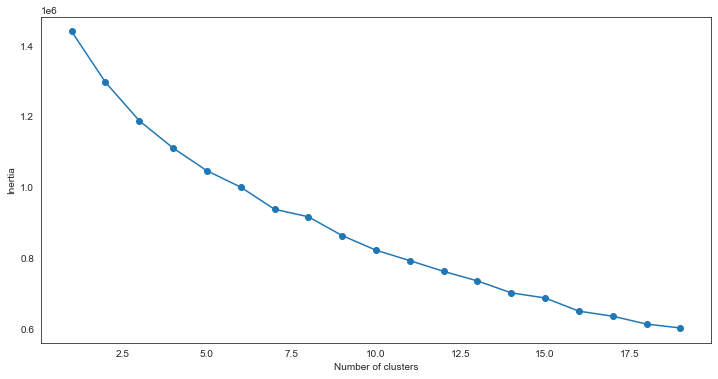

In [156]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [193]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5)
kmeans.fit(cust_df)
pred = kmeans.predict(cust_df)

In [194]:
pd.Series(pred).value_counts()

2    32145
1    30233
3     8383
4     5098
0     4141
dtype: int64

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x = cust_df
y = pd.Series(pred)

rf = RandomForestClassifier(max_depth=8, random_state=101, n_estimators=2000)
rf.fit(x, y)
predi = rf.predict(x)
accuracy_score(pred, predi)

0.9398625

In [196]:
importance = rf.feature_importances_

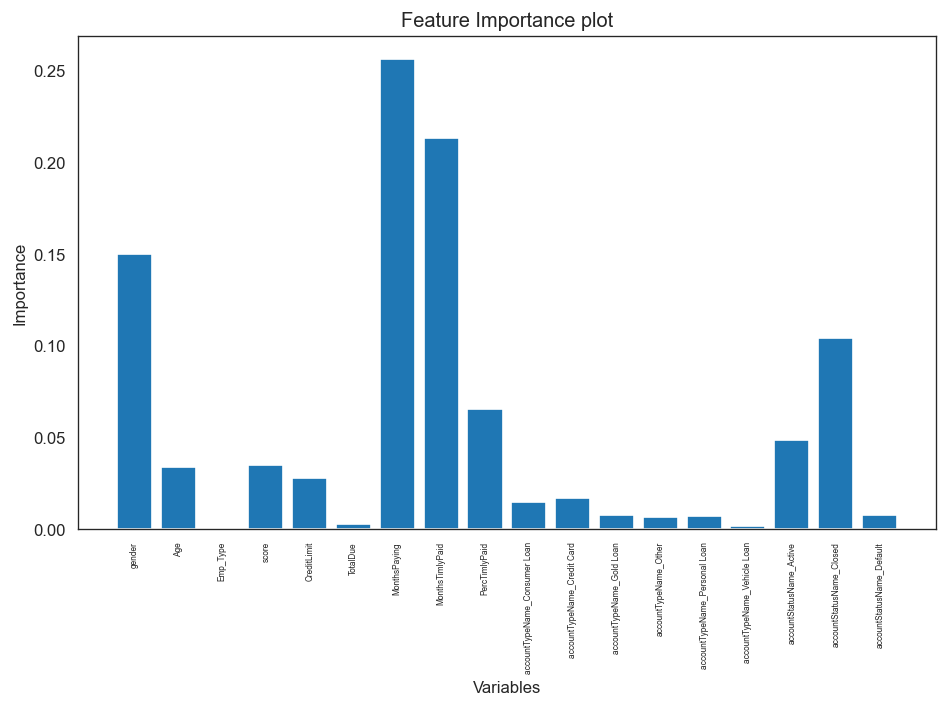

In [197]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x1 = range(len(x.columns))
y = importance
plt.bar( x1, y )
plt.xticks(x1,labels=list(x.columns), rotation='vertical', fontsize=5)
plt.xlabel( "Variables")
plt.ylabel('Importance')
plt.title('Feature Importance plot')
plt.tight_layout()

**Top most important variables based on random forest:**
1. MonthsPaying 
2. MonthsTimlyPaying 
3. Gender
4. AccountStatusName_Closed
5. AccountStatusName_Active

In [199]:
centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)
centers = pd.DataFrame(centers, columns= x.columns)

In [200]:
centers

,gender,Age,Emp_Type,score,CreditLimit,TotalDue,MonthsPaying,MonthsTimlyPaid,PercTimlyPaid,accountTypeName_Consumer Loan,accountTypeName_Credit Card,accountTypeName_Gold Loan,accountTypeName_Other,accountTypeName_Personal Loan,accountTypeName_Vehicle Loan,accountStatusName_Active,accountStatusName_Closed,accountStatusName_Default
0,0.954764,34.120083,1.535371,572.565796,169741.000000,89300.171875,22.500303,8.862723,45.498211,0.637637,0.504578,0.254101,0.449718,0.852509,0.656401,1.262991,1.259858,0.832049
1,0.999997,29.936069,1.554420,735.017334,95255.539062,53952.550781,9.254879,8.603574,95.605904,1.274572,0.498787,1.074103,0.602968,2.924189,0.452175,2.415966,4.350955,0.059926
2,0.999999,37.235909,1.590281,741.539062,285806.906250,134394.359375,23.374054,21.656435,93.739670,1.469208,1.801235,0.532337,1.047202,1.525247,1.076435,3.229030,4.027335,0.195306
3,0.978290,39.527546,1.608732,734.120361,292057.406250,113585.476562,17.092621,15.852003,94.607857,6.451866,4.426214,7.800817,4.388651,7.820456,2.868094,8.877235,23.915068,0.963734
4,0.001576,35.237808,1.537662,737.498291,480037.250000,211223.468750,17.747885,16.292084,93.765282,1.537074,1.347784,1.120634,1.040605,2.221655,0.598077,2.919381,4.758925,0.187526


In [239]:
centers['TotalDue']/centers['CreditLimit']

0    0.526097
1    0.566398
2    0.470228
3    0.388915
4    0.440015
dtype: float32

In [205]:
cust_df = scaler.inverse_transform(cust_df_scaled)
cust_df = pd.DataFrame(cust_df, columns=x.columns)
cust_df.head()

,gender,Age,Emp_Type,score,CreditLimit,TotalDue,MonthsPaying,MonthsTimlyPaid,PercTimlyPaid,accountTypeName_Consumer Loan,accountTypeName_Credit Card,accountTypeName_Gold Loan,accountTypeName_Other,accountTypeName_Personal Loan,accountTypeName_Vehicle Loan,accountStatusName_Active,accountStatusName_Closed,accountStatusName_Default
0,1.0,34.18750,1.0,717.0,17529.875000,9392.928711,9.484375,8.406250,90.6875,1.907348e-10,-9.536743e-10,5.000000e+00,4.615784e-08,2.200000e+01,-1.926422e-08,9.0,1.800000e+01,1.468658e-08
1,1.0,41.81250,1.0,716.0,74041.546875,16112.545898,14.968750,12.367188,87.2500,2.000000e+00,-9.536743e-10,2.300000e+01,1.000000e+00,1.000000e+00,6.000000e+00,9.0,2.400000e+01,1.468658e-08
2,1.0,55.09375,1.0,761.0,22451.453125,1212.451782,22.453125,21.359375,97.0000,1.907348e-10,1.100000e+01,4.329682e-08,4.615784e-08,1.754761e-08,-1.926422e-08,1.0,8.000000e+00,2.000000e+00
3,1.0,48.50000,2.0,790.0,382324.500000,242050.500000,25.000000,25.000000,100.0000,1.907348e-10,1.000000e+00,4.329682e-08,4.615784e-08,1.000000e+00,-1.926422e-08,2.0,-2.227783e-07,1.468658e-08
4,1.0,27.90625,2.0,699.0,23344.500000,11827.170898,9.164062,9.000000,99.0000,2.000000e+00,-9.536743e-10,4.329682e-08,4.615784e-08,9.000000e+00,1.000000e+00,5.0,7.000000e+00,1.468658e-08


<AxesSubplot:xlabel='Clusters', ylabel='count'>

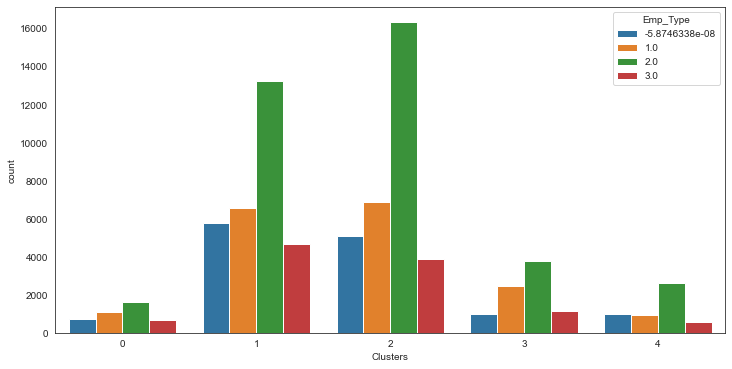

In [219]:
plt.figure(figsize=(12,6))
sns.countplot(cust_df['Clusters'], hue=cust_df['Emp_Type'])

<AxesSubplot:xlabel='Clusters', ylabel='count'>

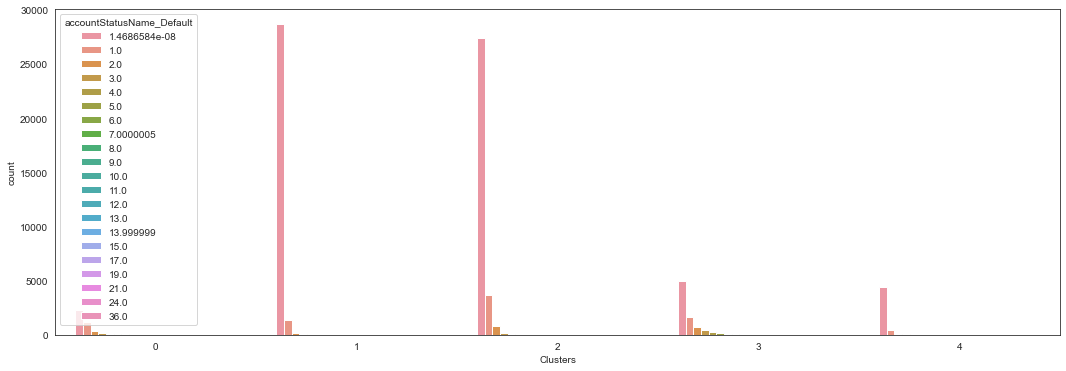

In [222]:
plt.figure(figsize=(18,6))
sns.countplot(cust_df['Clusters'], hue=cust_df['accountStatusName_Default'])

In [250]:
cust_df[cust_df['Clusters'] == 4]['accountStatusName_Default'].value_counts()

1.468658e-08    4447
1.000000e+00     466
2.000000e+00     113
3.000000e+00      43
4.000000e+00      18
5.000000e+00       6
7.000000e+00       3
6.000000e+00       2
Name: accountStatusName_Default, dtype: int64

In [251]:
4447/5098

0.8723028638681836